# Obtain downsampled corpus from Yelp dataset

In [1]:
random_state = 0

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import sys
from nltk import Text
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from time import time

In [3]:
sys.path.append('../../src/')
from proc_utils import string_concat

In [4]:
data_dir = '../../data/'
os.listdir(data_dir)

['review.csv']

In [5]:
t = time()
df = pd.read_csv(data_dir + 'review.csv')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) +
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) +
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 64.99 seconds
with 6,685,900 rows
and 9 columns
-- Column names:
 Index(['stars', 'review_id', 'user_id', 'funny', 'text', 'date', 'useful',
       'cool', 'business_id'],
      dtype='object')


## Drop missing values

In [6]:
mask1 = df['text'].isnull()
df = df[~mask1]
print("Records with no review text were dropped. {0:,} records remain in the DataFrame.".format(len(df)))

Records with no review text were dropped. 6,685,898 records remain in the DataFrame.


## Downsample majority classes

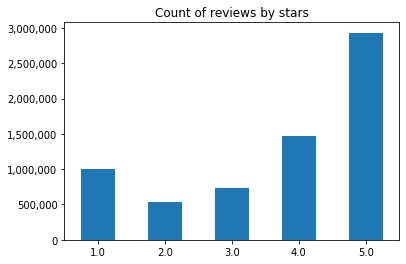

In [7]:
ax = df['stars'].value_counts().sort_index().plot(kind='bar')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)
plt.title("Count of reviews by stars");

In [8]:
df1 = df.query("stars == 1.0")
df2 = df.query("stars == 2.0")
df3 = df.query("stars == 3.0")
df4 = df.query("stars == 4.0")
df5 = df.query("stars == 5.0")

In [9]:
print("{0:,}".format(len(df1)))
print("{0:,}".format(len(df2)))
print("{0:,}".format(len(df3)))
print("{0:,}".format(len(df4)))
print("{0:,}".format(len(df5)))

1,002,158
542,394
739,279
1,468,985
2,933,082


In [12]:
df1 = resample(df1, replace=False, n_samples = len(df2), random_state=random_state)
df3 = resample(df3, replace=False, n_samples = len(df2), random_state=random_state)
df4 = resample(df4, replace=False, n_samples = len(df2), random_state=random_state)
df5 = resample(df5, replace=False, n_samples = len(df2), random_state=random_state)

In [13]:
print("{0:,}".format(len(df1)))
print("{0:,}".format(len(df2)))
print("{0:,}".format(len(df3)))
print("{0:,}".format(len(df4)))
print("{0:,}".format(len(df5)))

542,394
542,394
542,394
542,394
542,394


In [14]:
df_downsampled = pd.concat([df1, df2, df3, df4, df5])
print("{0:,} records in the downsampled DataFrame".format(len(df_downsampled)))

2,711,970 records in the downsampled DataFrame


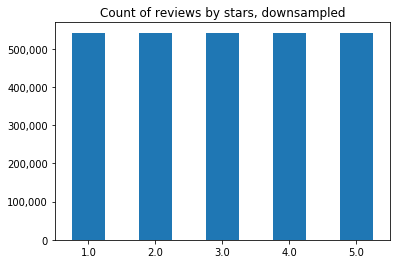

In [15]:
ax = df_downsampled['stars'].value_counts().sort_index().plot(kind='bar')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)
plt.title("Count of reviews by stars, downsampled");

## Save separate text files for each category of review (star rating)

In [25]:
os.listdir('../../data/')

['review.csv']

In [30]:
save_path = os.path.join(data_dir, 'corpus', '{0:.0f}_star'.format(star))

'../../data/corpus/asd'

In [ ]:
save_path = os.path.join('results', 'word_clouds')
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [39]:
stars = df_downsampled['stars'].unique()
t = time()
for star in stars:
    s = df_downsampled.query('stars == @star')
    corpus_string = string_concat(s['text'])
    save_dir = os.path.join(data_dir, 'corpus', '{0:.0f}_star'.format(star))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_path = os.path.join(save_dir, '{0:.0f}_star.txt'.format(star))
    with open(save_path, 'w') as f:
        f.write(corpus_string)
elapsed = time() - t
print("\n----- Corpus files saved, took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed/ 60))

First 500 symbols in the  string:

Not impressed at all! My mom was in the market for a Jeep Grand Cherokee Summit, so she asked for my help to shop. She lives in Show Low, which is almost a four hour drive to the dealership. After doing a little bit of research online and seeing what dealerships had some Summit editions in stock. I thought we give this place a try. After first arriving on the lot we were completely ignored by a small group of salesmen. They looked directly at us but seemed to express a "I don't care" attitude. W
First 500 symbols in the  string:

I was really looking forward to visiting after having some of their beers. The "Man O'War" quickly became my favorite DIPA; the Rusulka Vanilla Stout is a good thick, sweet stout; and the Ironclad is a top notch IPA. 
The only big miss on their beers I've had is the Big Chuck Barleywine. It could probably benefit greatly with age, but at this age all there is to taste is the alcohol.  
Nonetheless, I had enough to convince me

In [23]:
import nltk
nltk.data.path

['/home/stepan/snap/jupyter/6/nltk_data',
 '/snap/jupyter/6/nltk_data',
 '/snap/jupyter/6/share/nltk_data',
 '/snap/jupyter/6/lib/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data']

In [44]:
with open(data_dir + '/corpus/1_star/1_star.txt', 'r') as f:
    print(f.readline())

Not impressed at all! My mom was in the market for a Jeep Grand Cherokee Summit, so she asked for my help to shop. She lives in Show Low, which is almost a four hour drive to the dealership. After doing a little bit of research online and seeing what dealerships had some Summit editions in stock. I thought we give this place a try. After first arriving on the lot we were completely ignored by a small group of salesmen. They looked directly at us but seemed to express a "I don't care" attitude. Which is okay with me, it gave a us a few minutes to look at 2 cars before finally going in. I immediately went to the desk and said we have a few questions about a jeep. The lady then told us she'll get someone to help us. She went into a nearby room where a group of people were just laughing and talking. She then started to chat with them. Still this didn't anger us we just waited patiently but after 20 minutes I felt bad for my mom and just told her lets try another dealership. The lady at the

In [46]:
with open(data_dir + '/corpus/2_star/2_star.txt', 'r') as f:
    print(f.readline())

I was really looking forward to visiting after having some of their beers. The "Man O'War" quickly became my favorite DIPA; the Rusulka Vanilla Stout is a good thick, sweet stout; and the Ironclad is a top notch IPA. 



In [47]:
with open(data_dir + '/corpus/3_star/3_star.txt', 'r') as f:
    print(f.readline())

Only three overpriced pieces of tastless fish and a lot of fries. The only two good things are dipping sauces and the fries. We made a reservation for a group of 6 and were told they had a great table for us - the "chef's table." Unfortunately, the "chef's table" is apparently the one right beside the drafty front door. Not off to a great start and unfortunately, it didn't get a whole lot better. 



In [48]:
with open(data_dir + '/corpus/4_star/4_star.txt', 'r') as f:
    print(f.readline())

Hostesses seemed bothered we interrupted their conversation to find a table (same reaction several times... we were staying next door on business). Other than that, really enjoyed the service. Servers were always friendly, and the food was consistently good. Tried the short rib burrito,  carne asada burrito, Chipotle shrimp, street corn. Enjoyed all of the above. Would come back. Had a tough time deciding what to order as everything sounded delicious (and many dishes could be adapted to be vegan and/or vegetarian), but I settled on the mushroom benny with goat cheese. The herbed hollandaise was delish and my eggs were cooked perfectly. I paid a few extra bucks for the goat cheese, which I hardly noticed, so that wasn't worth the extra cost. Their coffee is excellent. Service was slow, but there was only one server managing a large number of tables and she was doing her best, so we were patient. Everyone in our party loved their meals. Dress warmly if it's cold outside, as there can be 

In [49]:
with open(data_dir + '/corpus/5_star/5_star.txt', 'r') as f:
    print(f.readline())

Integrity and prideful work still exist! We strongly recommend ZZYZX plumbing to anyone looking for a reliable, professional plumber. We gave been fortunate to have Jim address all our plumbing needs in our home and wouldn't think of using anyone else. He is pleasant, courteous, knowledgeable, efficient and punctual. His fees are reasonable and competitive and his workmanship is stellar. Do yourself a favor. Call ZZYZX plumbing. I love Dutch Bros!!!!! We are so happy this location is literally down the road from me!!! 



In [59]:
from nltk.corpus import LazyCorpusLoader, CategorizedPlaintextCorpusReader
yelp_reviews = LazyCorpusLoader('yelp_reviews', CategorizedPlaintextCorpusReader, r'(?!\.).*\.txt', 
                                cat_pattern=r'\d_star/.*', encoding='ascii')

In [64]:
yelp_reviews.words()

['Not', 'impressed', 'at', 'all', '!', 'My', 'mom', ...]

In [63]:
len(yelp_reviews.words())

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 450: ordinal not in range(128)